# Assignment 2:  Implicit Neural Representation

Name: **Mayank Sharma**

UID:  **119203859**

Link to Google Drive : **https://drive.google.com/file/d/1vbWCA-YL9edBhQS0Zibeh_p61bGRLz0W/view?usp=sharing**

Please submit a PDF containing all outputs to gradescope by **October 31, 11:59pm**

----------------------------

In this assignment, you will get some hands-on experience with implicit neural representation (INR). With INR, we parameterize some signal (in our case images) with a neural network (in this assignment, we will use a basic feed-forward network). While in practice this might be useful for outpainting, super-resolution, and compression, in this assignment we will mainly focus on the basics, with some proof-of-concept outpainting at the end. Your outputs might not look great, this is okay as long as they are at least as good as the examples.

## Dataset

As always, we start with the data. In this section, you will need to complete the following steps:

1. Choose an image. If you're working in colab, you will need to either mount your Google Drive, or else upload the file directly.
2. Write SingleImageDataset. This is how you'll convert your image into model inputs and targets. You will instantiate the dataset and a dataloader to check and make sure you did this part correctly.

### Question 1: Selecting an image (5 points)

Free points! Just show your image here. One catch- make sure the image is less than 62500 pixels, total. We do not want you to waste time waiting for your model to train.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

# FOLDERNAME = 'CMSC828i/HW2'
# assert FOLDERNAME is not None, "[!] Enter the foldername."

# # Now that we've mounted your Drive, this ensures that
# # the Python interpreter of the Colab VM can load
# # python files from within it.
# import sys
# sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

!wget --no-check-certificate "https://drive.google.com/uc?export=download&id=1TvD6ybPj1NiJgm5bLPzG31HbwA3_LncY" -O mypeacock.jpg

--2023-10-31 19:47:09--  https://drive.google.com/uc?export=download&id=1TvD6ybPj1NiJgm5bLPzG31HbwA3_LncY
Resolving drive.google.com (drive.google.com)... 172.253.115.101, 172.253.115.100, 172.253.115.113, ...
Connecting to drive.google.com (drive.google.com)|172.253.115.101|:443... connected.
HTTP request sent, awaiting response... 

303 See Other
Location: https://doc-08-0o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lplj6ij4k23t42vq2c2c34ct305dk4v8/1698795975000/10921789810122388020/*/1TvD6ybPj1NiJgm5bLPzG31HbwA3_LncY?e=download&uuid=851fde1b-61b6-4a9a-a8be-7fcd5e5c5f06 [following]
--2023-10-31 19:47:10--  https://doc-08-0o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lplj6ij4k23t42vq2c2c34ct305dk4v8/1698795975000/10921789810122388020/*/1TvD6ybPj1NiJgm5bLPzG31HbwA3_LncY?e=download&uuid=851fde1b-61b6-4a9a-a8be-7fcd5e5c5f06
Resolving doc-08-0o-docs.googleusercontent.com (doc-08-0o-docs.googleusercontent.com)... 172.253.63.132, 2607:f8b0:4004:c08::84
Connecting to doc-08-0o-docs.googleusercontent.com (doc-08-0o-docs.googleusercontent.com)|172.253.63.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44029 (43K) [image/jpeg]
Saving to: ‘mypeacock.jpg’

mypeacock.jpg       100%[===================>]  43.00K  --.-KB/s    in 0.008s  



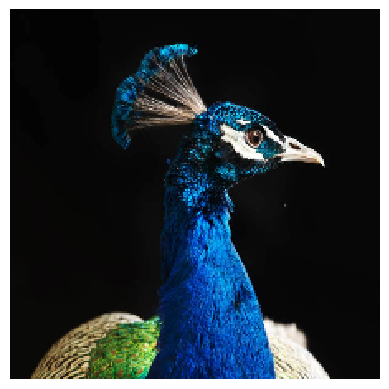

In [ ]:
from torchvision.io import read_image  ## Note: feel free to use another loader
import matplotlib.pyplot as plt

image = read_image("/home/mayank/828i/HW2/mypeacock.jpg")
plt.imshow(image.permute(1, 2, 0).numpy())
plt.axis('off')
plt.show()
plt.close()

In [ ]:
print(image.shape)
num_pix=image.shape[1]*image.shape[2]
print(num_pix)

torch.Size([3, 224, 224])
50176


### Question 2: Writing the dataset (20 points)

For this part, you need to fill in the blanks for the dataset provided below. Alternatively, feel free to write it from scratch, the scaffolding was provided to help you, not to trap you in a box.

You will also need to write a loop to construct the image, using a dataloader for your SingleImageDataset. We provide more details in comments below.

We will be grading your code and your image outputs. In Gradescope, make sure both are fully visible.

In [ ]:
from torchvision.io import read_image
from torch.utils.data import Dataset

class SingleImageDataset(Dataset):
    def __init__(self, img_path):
        self.image = read_image(img_path)
        self.num_channels, self.h, self.w = self.image.shape

    def __len__(self):
        ### TODO: 1 line of code for returning the number of pixels
        num_pix=self.h*self.w
        return num_pix


    def __getitem__(self, idx):
        ### TODO: 2-3 lines of code for x, y, and pixel values
        x=idx//self.w
        y=idx%self.w
        intensity =image[:,y,x]
        return {"x": x, "y": y, "intensity": intensity}

224


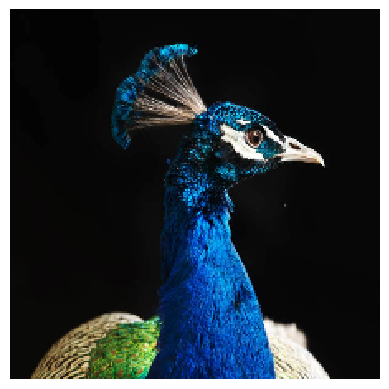

In [ ]:
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
dataset = SingleImageDataset('/home/mayank/828i/HW2/mypeacock.jpg')

### TODO: 1 line of code for initializing a DataLoader
dataloader =DataLoader(dataset,batch_size=4096,shuffle=True)
height,width=dataset.h,dataset.w
print(height)
### TODO: 6-10 lines of code for using your dataloader to retrieve, reassemble,
###       and display your image
#creat a zeros np array
peacock_image = np.zeros((dataset.h,dataset.w,3),dtype=np.uint8)
for batch in dataloader:
    x, y, intensity = batch["x"], batch["y"], batch["intensity"]
    #detach so that tensor is without gradient and converting to numpy array
    x= x.detach().numpy()
    y = y.detach().numpy()
    intensity = intensity.detach().numpy()
    #get intensity for y,x pixel values
    for idx, (y_, x_) in enumerate(zip(y,x)):
        peacock_image[y_,x_,:] = intensity[idx]


plt.imshow(peacock_image)
plt.axis('off')
plt.show()

## Network


### Question 3: Defining the Network (15 points)

Define a feedforward neural network.
Remember that the last layer output dimension should be equal to the number of color channels.

A very basic network might have a linear layer, followed by a ReLU, followed by another linear layer.

In [ ]:
class FFN(torch.nn.Module):
    def __init__(self,number_input=2):
        super(FFN, self).__init__()
        ### TODO: define and initialize some layers with weights
        #created 2 hidden layers
        self.layers = torch.nn.Sequential(
        torch.nn.Linear(number_input,1024),
        torch.nn.ReLU(),
        torch.nn.Linear(1024,2048),
        torch.nn.ReLU(),
        torch.nn.Linear(2048,1024),
        torch.nn.ReLU(),
        torch.nn.Linear(1024,3))

    def forward(self, coord):
        out = self.layers(coord)
        return out


In [ ]:
is_cuda_available = torch.cuda.is_available()
if is_cuda_available:
    print("Using CUDA")
device = torch.device("cuda:0" if is_cuda_available else "cpu")
print(device)

Using CUDA
cuda:0


## Training

Now that you have a dataset and model, time to put it together!

Instantiate an optimizer and a criterion.
Loop over your dataset until the network converges.
Track your loss. We will be asking you to plot it later.

In [ ]:
from tqdm import tqdm
from torch.optim.lr_scheduler import ReduceLROnPlateau
import time
net = FFN()
net=net.to(device)
# since we are training the network for pixels,
# we will do a pixelwise MSE loss
criterion = torch.nn.MSELoss()

### TODO: 2 lines of code for optimizer, number of epochs
optimizer = torch.optim.Adam(net.parameters(),lr=1e-2)
#Reduce learning rate when a metric has stopped improving
scheduler = ReduceLROnPlateau(optimizer, factor=0.1, patience=5, verbose=True)
NUM_EPOCHS = 200
losses=[]
### TODO: set up mechanism for storing loss values
for epoch in tqdm(range(NUM_EPOCHS)):

      list_losses = []
      running_corrects=0
      n_sample = 0
      for batch in dataloader:
            x, y, actual = batch["x"], batch["y"], batch["intensity"]
            #USIng GPU so moving data to device
            x = x.to(device)
            y = y.to(device)
            actual = actual.float().to(device)
            #normalize from 0 to 1
            x = x / dataset.w
            y = y / dataset.h
            ### TODO: 3 lines of code to assemble coord from x and y, pass to net,
            ###       compute loss
            coord =torch.vstack([x, y]).T
            pred = net(coord)
            loss =criterion(pred, actual)
            list_losses.append(loss.item())
            optimizer.zero_grad()

            loss.backward()
            optimizer.step()
            ### TODO: track loss
            losses.append(loss.item())
      # data.set_description(f'Epoch [{epoch}/{NUM_EPOCHS}]')
      # data.set_postfix(acc=(running_corrects/n_sample).item())
      average_loss = sum(list_losses)/len(list_losses)
      scheduler.step(average_loss)
      time_diff = time.time() - starting_time

      print("Epoch: [{}/{}] Time: {}min:{}sec Loss: {:.4f}".format(epoch, NUM_EPOCHS, time_diff//60, time_diff%60, average_loss))

  0%|          | 1/200 [00:03<10:24,  3.14s/it]

Epoch: [0/200] Time: 0.0min:3.135509490966797sec Loss: 3788.6218


  1%|          | 2/200 [00:04<06:53,  2.09s/it]

Epoch: [1/200] Time: 0.0min:1.3537671566009521sec Loss: 2603.5746


  2%|▏         | 3/200 [00:05<05:55,  1.81s/it]

Epoch: [2/200] Time: 0.0min:1.4696547985076904sec Loss: 2403.8772


  2%|▏         | 4/200 [00:07<05:15,  1.61s/it]

Epoch: [3/200] Time: 0.0min:1.3046929836273193sec Loss: 2086.7291


  2%|▎         | 5/200 [00:08<04:48,  1.48s/it]

Epoch: [4/200] Time: 0.0min:1.2495806217193604sec Loss: 1778.1659


  3%|▎         | 6/200 [00:09<04:34,  1.42s/it]

Epoch: [5/200] Time: 0.0min:1.2926790714263916sec Loss: 1676.3879


  4%|▎         | 7/200 [00:11<04:21,  1.35s/it]

Epoch: [6/200] Time: 0.0min:1.2210519313812256sec Loss: 1626.4784


  4%|▍         | 8/200 [00:12<04:12,  1.31s/it]

Epoch: [7/200] Time: 0.0min:1.2319309711456299sec Loss: 1439.4777


  4%|▍         | 9/200 [00:13<04:05,  1.29s/it]

Epoch: [8/200] Time: 0.0min:1.2235777378082275sec Loss: 1333.3139


  5%|▌         | 10/200 [00:14<03:57,  1.25s/it]

Epoch: [9/200] Time: 0.0min:1.1675832271575928sec Loss: 1225.8263


  6%|▌         | 11/200 [00:15<03:54,  1.24s/it]

Epoch: [10/200] Time: 0.0min:1.2235393524169922sec Loss: 1157.0521


  6%|▌         | 12/200 [00:17<03:53,  1.24s/it]

Epoch: [11/200] Time: 0.0min:1.2474498748779297sec Loss: 1102.2501


  6%|▋         | 13/200 [00:18<03:50,  1.23s/it]

Epoch: [12/200] Time: 0.0min:1.208313226699829sec Loss: 1065.3828


  7%|▋         | 14/200 [00:19<03:48,  1.23s/it]

Epoch: [13/200] Time: 0.0min:1.221627950668335sec Loss: 1000.3791


  8%|▊         | 15/200 [00:20<03:44,  1.21s/it]

Epoch: [14/200] Time: 0.0min:1.1667072772979736sec Loss: 952.4100


  8%|▊         | 16/200 [00:22<03:48,  1.24s/it]

Epoch: [15/200] Time: 0.0min:1.3102400302886963sec Loss: 924.3752


  8%|▊         | 17/200 [00:23<03:46,  1.24s/it]

Epoch: [16/200] Time: 0.0min:1.2337658405303955sec Loss: 897.7581


  9%|▉         | 18/200 [00:24<03:51,  1.27s/it]

Epoch: [17/200] Time: 0.0min:1.3413007259368896sec Loss: 876.0740


 10%|▉         | 19/200 [00:25<03:50,  1.27s/it]

Epoch: [18/200] Time: 0.0min:1.2819209098815918sec Loss: 842.6161


 10%|█         | 20/200 [00:27<03:42,  1.24s/it]

Epoch: [19/200] Time: 0.0min:1.1528453826904297sec Loss: 901.4050


 10%|█         | 21/200 [00:28<03:41,  1.24s/it]

Epoch: [20/200] Time: 0.0min:1.2421834468841553sec Loss: 882.7867


 11%|█         | 22/200 [00:29<03:36,  1.22s/it]

Epoch: [21/200] Time: 0.0min:1.1578662395477295sec Loss: 818.1167


 12%|█▏        | 23/200 [00:30<03:40,  1.25s/it]

Epoch: [22/200] Time: 0.0min:1.3225724697113037sec Loss: 832.5837


 12%|█▏        | 24/200 [00:32<03:43,  1.27s/it]

Epoch: [23/200] Time: 0.0min:1.3293328285217285sec Loss: 813.2245


 12%|█▎        | 25/200 [00:33<03:36,  1.24s/it]

Epoch: [24/200] Time: 0.0min:1.1583597660064697sec Loss: 801.1717


 13%|█▎        | 26/200 [00:34<03:35,  1.24s/it]

Epoch: [25/200] Time: 0.0min:1.2298734188079834sec Loss: 786.5365


 14%|█▎        | 27/200 [00:35<03:29,  1.21s/it]

Epoch: [26/200] Time: 0.0min:1.1567137241363525sec Loss: 813.2420


 14%|█▍        | 28/200 [00:36<03:29,  1.22s/it]

Epoch: [27/200] Time: 0.0min:1.231433391571045sec Loss: 825.3330


 14%|█▍        | 29/200 [00:38<03:29,  1.22s/it]

Epoch: [28/200] Time: 0.0min:1.2375802993774414sec Loss: 743.6691


 15%|█▌        | 30/200 [00:39<03:33,  1.25s/it]

Epoch: [29/200] Time: 0.0min:1.3239176273345947sec Loss: 759.0732


 16%|█▌        | 31/200 [00:40<03:31,  1.25s/it]

Epoch: [30/200] Time: 0.0min:1.2449188232421875sec Loss: 728.5509


 16%|█▌        | 32/200 [00:42<03:33,  1.27s/it]

Epoch: [31/200] Time: 0.0min:1.3090271949768066sec Loss: 713.6526


 16%|█▋        | 33/200 [00:43<03:25,  1.23s/it]

Epoch: [32/200] Time: 0.0min:1.1480731964111328sec Loss: 709.5783


 17%|█▋        | 34/200 [00:44<03:24,  1.23s/it]

Epoch: [33/200] Time: 0.0min:1.2316629886627197sec Loss: 733.4759


 18%|█▊        | 35/200 [00:45<03:25,  1.24s/it]

Epoch: [34/200] Time: 0.0min:1.2673778533935547sec Loss: 738.8306


 18%|█▊        | 36/200 [00:46<03:22,  1.23s/it]

Epoch: [35/200] Time: 0.0min:1.2034988403320312sec Loss: 754.3849


 18%|█▊        | 37/200 [00:48<03:22,  1.24s/it]

Epoch: [36/200] Time: 0.0min:1.2574512958526611sec Loss: 773.6418


 19%|█▉        | 38/200 [00:49<03:20,  1.24s/it]

Epoch: [37/200] Time: 0.0min:1.239457368850708sec Loss: 808.1753


 20%|█▉        | 39/200 [00:50<03:19,  1.24s/it]

Epoch 00039: reducing learning rate of group 0 to 1.0000e-03.
Epoch: [38/200] Time: 0.0min:1.2331323623657227sec Loss: 744.9838


 20%|██        | 40/200 [00:51<03:18,  1.24s/it]

Epoch: [39/200] Time: 0.0min:1.2376821041107178sec Loss: 667.9452


 20%|██        | 41/200 [00:53<03:17,  1.24s/it]

Epoch: [40/200] Time: 0.0min:1.2439610958099365sec Loss: 660.2486


 21%|██        | 42/200 [00:54<03:15,  1.24s/it]

Epoch: [41/200] Time: 0.0min:1.2295887470245361sec Loss: 659.8045


 22%|██▏       | 43/200 [00:55<03:10,  1.21s/it]

Epoch: [42/200] Time: 0.0min:1.1564958095550537sec Loss: 648.6868


 22%|██▏       | 44/200 [00:56<03:09,  1.22s/it]

Epoch: [43/200] Time: 0.0min:1.2186639308929443sec Loss: 654.1182


 22%|██▎       | 45/200 [00:57<03:09,  1.22s/it]

Epoch: [44/200] Time: 0.0min:1.232266902923584sec Loss: 651.2106


 23%|██▎       | 46/200 [00:59<03:09,  1.23s/it]

Epoch: [45/200] Time: 0.0min:1.246570110321045sec Loss: 642.1797


 24%|██▎       | 47/200 [01:00<03:07,  1.23s/it]

Epoch: [46/200] Time: 0.0min:1.2218456268310547sec Loss: 647.9054


 24%|██▍       | 48/200 [01:01<03:07,  1.23s/it]

Epoch: [47/200] Time: 0.0min:1.2455973625183105sec Loss: 645.6041


 24%|██▍       | 49/200 [01:02<03:07,  1.24s/it]

Epoch: [48/200] Time: 0.0min:1.250978946685791sec Loss: 645.4810


 25%|██▌       | 50/200 [01:04<03:05,  1.24s/it]

Epoch: [49/200] Time: 0.0min:1.2335126399993896sec Loss: 644.6602


 26%|██▌       | 51/200 [01:05<03:00,  1.21s/it]

Epoch: [50/200] Time: 0.0min:1.1488959789276123sec Loss: 633.2019


 26%|██▌       | 52/200 [01:06<02:59,  1.21s/it]

Epoch: [51/200] Time: 0.0min:1.2193613052368164sec Loss: 642.2940


 26%|██▋       | 53/200 [01:07<02:55,  1.20s/it]

Epoch: [52/200] Time: 0.0min:1.1524333953857422sec Loss: 643.3905


 27%|██▋       | 54/200 [01:08<02:56,  1.21s/it]

Epoch: [53/200] Time: 0.0min:1.2463898658752441sec Loss: 638.2942


 28%|██▊       | 55/200 [01:10<02:57,  1.22s/it]

Epoch: [54/200] Time: 0.0min:1.249770164489746sec Loss: 638.7918


 28%|██▊       | 56/200 [01:11<02:53,  1.21s/it]

Epoch: [55/200] Time: 0.0min:1.1641063690185547sec Loss: 635.3687


 28%|██▊       | 57/200 [01:12<02:53,  1.21s/it]

Epoch: [56/200] Time: 0.0min:1.2346045970916748sec Loss: 630.6343


 29%|██▉       | 58/200 [01:13<02:55,  1.23s/it]

Epoch: [57/200] Time: 0.0min:1.280195713043213sec Loss: 631.4443


 30%|██▉       | 59/200 [01:14<02:51,  1.21s/it]

Epoch: [58/200] Time: 0.0min:1.1632168292999268sec Loss: 634.2031


 30%|███       | 60/200 [01:16<02:50,  1.22s/it]

Epoch: [59/200] Time: 0.0min:1.2347464561462402sec Loss: 635.8896


 30%|███       | 61/200 [01:17<02:50,  1.23s/it]

Epoch: [60/200] Time: 0.0min:1.24119234085083sec Loss: 637.4935


 31%|███       | 62/200 [01:18<02:54,  1.27s/it]

Epoch: [61/200] Time: 0.0min:1.3556139469146729sec Loss: 636.4495


 32%|███▏      | 63/200 [01:20<02:53,  1.27s/it]

Epoch: [62/200] Time: 0.0min:1.2663471698760986sec Loss: 629.4854


 32%|███▏      | 64/200 [01:21<02:51,  1.26s/it]

Epoch: [63/200] Time: 0.0min:1.2514855861663818sec Loss: 621.7760


 32%|███▎      | 65/200 [01:22<02:49,  1.25s/it]

Epoch: [64/200] Time: 0.0min:1.2316734790802002sec Loss: 631.1841


 33%|███▎      | 66/200 [01:24<02:57,  1.33s/it]

Epoch: [65/200] Time: 0.0min:1.4961879253387451sec Loss: 623.6454


 34%|███▎      | 67/200 [01:25<02:50,  1.28s/it]

Epoch: [66/200] Time: 0.0min:1.1757431030273438sec Loss: 617.7020


 34%|███▍      | 68/200 [01:26<02:49,  1.28s/it]

Epoch: [67/200] Time: 0.0min:1.2809276580810547sec Loss: 626.8711


 34%|███▍      | 69/200 [01:27<02:47,  1.28s/it]

Epoch: [68/200] Time: 0.0min:1.272148847579956sec Loss: 618.4045


 35%|███▌      | 70/200 [01:29<02:48,  1.30s/it]

Epoch: [69/200] Time: 0.0min:1.3374419212341309sec Loss: 620.0683


 36%|███▌      | 71/200 [01:30<02:46,  1.29s/it]

Epoch: [70/200] Time: 0.0min:1.2771823406219482sec Loss: 621.6935


 36%|███▌      | 72/200 [01:31<02:41,  1.26s/it]

Epoch: [71/200] Time: 0.0min:1.1806979179382324sec Loss: 624.1589


 36%|███▋      | 73/200 [01:32<02:39,  1.26s/it]

Epoch 00073: reducing learning rate of group 0 to 1.0000e-04.
Epoch: [72/200] Time: 0.0min:1.2603414058685303sec Loss: 619.2128


 37%|███▋      | 74/200 [01:34<02:35,  1.23s/it]

Epoch: [73/200] Time: 0.0min:1.1715710163116455sec Loss: 618.3342


 38%|███▊      | 75/200 [01:35<02:34,  1.23s/it]

Epoch: [74/200] Time: 0.0min:1.2330801486968994sec Loss: 618.9860


 38%|███▊      | 76/200 [01:36<02:33,  1.24s/it]

Epoch: [75/200] Time: 0.0min:1.2582175731658936sec Loss: 617.2442


 38%|███▊      | 77/200 [01:37<02:33,  1.25s/it]

Epoch: [76/200] Time: 0.0min:1.2648401260375977sec Loss: 622.2029


 39%|███▉      | 78/200 [01:39<02:34,  1.27s/it]

Epoch: [77/200] Time: 0.0min:1.3172764778137207sec Loss: 621.3791


 40%|███▉      | 79/200 [01:40<02:30,  1.24s/it]

Epoch: [78/200] Time: 0.0min:1.1817705631256104sec Loss: 616.9208


 40%|████      | 80/200 [01:41<02:30,  1.25s/it]

Epoch: [79/200] Time: 0.0min:1.280810832977295sec Loss: 617.8215


 40%|████      | 81/200 [01:42<02:29,  1.26s/it]

Epoch: [80/200] Time: 0.0min:1.260545253753662sec Loss: 617.9098


 41%|████      | 82/200 [01:44<02:25,  1.24s/it]

Epoch: [81/200] Time: 0.0min:1.190896987915039sec Loss: 619.0059


 42%|████▏     | 83/200 [01:45<02:25,  1.24s/it]

Epoch: [82/200] Time: 0.0min:1.247424840927124sec Loss: 617.7538


 42%|████▏     | 84/200 [01:46<02:24,  1.25s/it]

Epoch: [83/200] Time: 0.0min:1.2659904956817627sec Loss: 609.7474


 42%|████▎     | 85/200 [01:47<02:21,  1.23s/it]

Epoch: [84/200] Time: 0.0min:1.1752328872680664sec Loss: 622.2654


 43%|████▎     | 86/200 [01:48<02:21,  1.24s/it]

Epoch: [85/200] Time: 0.0min:1.2655293941497803sec Loss: 611.3241


 44%|████▎     | 87/200 [01:50<02:20,  1.24s/it]

Epoch: [86/200] Time: 0.0min:1.2443408966064453sec Loss: 611.7873


 44%|████▍     | 88/200 [01:51<02:19,  1.24s/it]

Epoch: [87/200] Time: 0.0min:1.2535600662231445sec Loss: 615.5173


 44%|████▍     | 89/200 [01:52<02:18,  1.25s/it]

Epoch: [88/200] Time: 0.0min:1.2641031742095947sec Loss: 615.3481


 45%|████▌     | 90/200 [01:53<02:15,  1.23s/it]

Epoch 00090: reducing learning rate of group 0 to 1.0000e-05.
Epoch: [89/200] Time: 0.0min:1.1922810077667236sec Loss: 614.6141


 46%|████▌     | 91/200 [01:55<02:15,  1.24s/it]

Epoch: [90/200] Time: 0.0min:1.258512020111084sec Loss: 612.1209


 46%|████▌     | 92/200 [01:56<02:15,  1.26s/it]

Epoch: [91/200] Time: 0.0min:1.2929601669311523sec Loss: 618.4169


 46%|████▋     | 93/200 [01:57<02:12,  1.24s/it]

Epoch: [92/200] Time: 0.0min:1.191450595855713sec Loss: 618.1463


 47%|████▋     | 94/200 [01:58<02:12,  1.25s/it]

Epoch: [93/200] Time: 0.0min:1.2623686790466309sec Loss: 616.2202


 48%|████▊     | 95/200 [02:00<02:11,  1.26s/it]

Epoch: [94/200] Time: 0.0min:1.2806215286254883sec Loss: 616.5289


 48%|████▊     | 96/200 [02:01<02:10,  1.26s/it]

Epoch 00096: reducing learning rate of group 0 to 1.0000e-06.
Epoch: [95/200] Time: 0.0min:1.2627439498901367sec Loss: 612.8900


 48%|████▊     | 97/200 [02:02<02:09,  1.26s/it]

Epoch: [96/200] Time: 0.0min:1.2684576511383057sec Loss: 619.2078


 49%|████▉     | 98/200 [02:03<02:06,  1.24s/it]

Epoch: [97/200] Time: 0.0min:1.2002899646759033sec Loss: 616.9749


 50%|████▉     | 99/200 [02:05<02:06,  1.25s/it]

Epoch: [98/200] Time: 0.0min:1.2572860717773438sec Loss: 616.2019


 50%|█████     | 100/200 [02:06<02:02,  1.23s/it]

Epoch: [99/200] Time: 0.0min:1.1858282089233398sec Loss: 616.4232


 50%|█████     | 101/200 [02:07<02:02,  1.24s/it]

Epoch: [100/200] Time: 0.0min:1.2621114253997803sec Loss: 618.5805


 51%|█████     | 102/200 [02:09<02:04,  1.27s/it]

Epoch: [101/200] Time: 0.0min:1.3325812816619873sec Loss: 609.5305


 52%|█████▏    | 103/200 [02:10<02:00,  1.24s/it]

Epoch: [102/200] Time: 0.0min:1.1807615756988525sec Loss: 614.0664


 52%|█████▏    | 104/200 [02:11<02:00,  1.25s/it]

Epoch: [103/200] Time: 0.0min:1.271183967590332sec Loss: 619.0173


 52%|█████▎    | 105/200 [02:12<01:59,  1.25s/it]

Epoch: [104/200] Time: 0.0min:1.2596302032470703sec Loss: 621.8454


 53%|█████▎    | 106/200 [02:14<01:58,  1.26s/it]

Epoch: [105/200] Time: 0.0min:1.2895183563232422sec Loss: 616.2960


 54%|█████▎    | 107/200 [02:15<01:58,  1.27s/it]

Epoch: [106/200] Time: 0.0min:1.292299509048462sec Loss: 617.7241


 54%|█████▍    | 108/200 [02:16<01:54,  1.25s/it]

Epoch 00108: reducing learning rate of group 0 to 1.0000e-07.
Epoch: [107/200] Time: 0.0min:1.180102825164795sec Loss: 619.9808


 55%|█████▍    | 109/200 [02:17<01:53,  1.25s/it]

Epoch: [108/200] Time: 0.0min:1.26633882522583sec Loss: 615.5437


 55%|█████▌    | 110/200 [02:19<01:53,  1.26s/it]

Epoch: [109/200] Time: 0.0min:1.2744576930999756sec Loss: 617.6359


 56%|█████▌    | 111/200 [02:20<01:51,  1.25s/it]

Epoch: [110/200] Time: 0.0min:1.2221360206604004sec Loss: 625.1294


 56%|█████▌    | 112/200 [02:21<01:51,  1.26s/it]

Epoch: [111/200] Time: 0.0min:1.2991840839385986sec Loss: 620.8562


 56%|█████▋    | 113/200 [02:22<01:50,  1.27s/it]

Epoch: [112/200] Time: 0.0min:1.2919750213623047sec Loss: 619.8311


 57%|█████▋    | 114/200 [02:24<01:47,  1.25s/it]

Epoch 00114: reducing learning rate of group 0 to 1.0000e-08.
Epoch: [113/200] Time: 0.0min:1.194382905960083sec Loss: 617.9140


 57%|█████▊    | 115/200 [02:25<01:46,  1.25s/it]

Epoch: [114/200] Time: 0.0min:1.2613825798034668sec Loss: 611.4271


 58%|█████▊    | 116/200 [02:26<01:44,  1.24s/it]

Epoch: [115/200] Time: 0.0min:1.208559274673462sec Loss: 609.6812


 58%|█████▊    | 117/200 [02:27<01:43,  1.25s/it]

Epoch: [116/200] Time: 0.0min:1.2710285186767578sec Loss: 620.5427


 59%|█████▉    | 118/200 [02:29<01:43,  1.26s/it]

Epoch: [117/200] Time: 0.0min:1.275571584701538sec Loss: 616.4275


 60%|█████▉    | 119/200 [02:30<01:40,  1.25s/it]

Epoch: [118/200] Time: 0.0min:1.2168972492218018sec Loss: 612.9193


 60%|██████    | 120/200 [02:31<01:40,  1.25s/it]

Epoch: [119/200] Time: 0.0min:1.275137186050415sec Loss: 615.4663


 60%|██████    | 121/200 [02:32<01:37,  1.24s/it]

Epoch: [120/200] Time: 0.0min:1.189347743988037sec Loss: 613.4592


 61%|██████    | 122/200 [02:34<01:37,  1.24s/it]

Epoch: [121/200] Time: 0.0min:1.2661890983581543sec Loss: 621.9325


 62%|██████▏   | 123/200 [02:35<01:37,  1.26s/it]

Epoch: [122/200] Time: 0.0min:1.2965545654296875sec Loss: 610.1649


 62%|██████▏   | 124/200 [02:36<01:34,  1.25s/it]

Epoch: [123/200] Time: 0.0min:1.209820032119751sec Loss: 611.1327


 62%|██████▎   | 125/200 [02:37<01:34,  1.25s/it]

Epoch: [124/200] Time: 0.0min:1.2740585803985596sec Loss: 613.5614


 63%|██████▎   | 126/200 [02:39<01:31,  1.24s/it]

Epoch: [125/200] Time: 0.0min:1.1975233554840088sec Loss: 613.7775


 64%|██████▎   | 127/200 [02:40<01:31,  1.25s/it]

Epoch: [126/200] Time: 0.0min:1.2678520679473877sec Loss: 612.8349


 64%|██████▍   | 128/200 [02:41<01:30,  1.25s/it]

Epoch: [127/200] Time: 0.0min:1.2700259685516357sec Loss: 610.2138


 64%|██████▍   | 129/200 [02:42<01:27,  1.23s/it]

Epoch: [128/200] Time: 0.0min:1.1842925548553467sec Loss: 613.6702


 65%|██████▌   | 130/200 [02:43<01:26,  1.24s/it]

Epoch: [129/200] Time: 0.0min:1.256087303161621sec Loss: 614.0246


 66%|██████▌   | 131/200 [02:45<01:24,  1.23s/it]

Epoch: [130/200] Time: 0.0min:1.1920249462127686sec Loss: 615.9255


 66%|██████▌   | 132/200 [02:46<01:24,  1.24s/it]

Epoch: [131/200] Time: 0.0min:1.2726376056671143sec Loss: 615.3475


 66%|██████▋   | 133/200 [02:47<01:23,  1.25s/it]

Epoch: [132/200] Time: 0.0min:1.281592845916748sec Loss: 614.8596


 67%|██████▋   | 134/200 [02:48<01:21,  1.24s/it]

Epoch: [133/200] Time: 0.0min:1.2020447254180908sec Loss: 609.2893


 68%|██████▊   | 135/200 [02:50<01:21,  1.25s/it]

Epoch: [134/200] Time: 0.0min:1.2920660972595215sec Loss: 616.6820


 68%|██████▊   | 136/200 [02:51<01:20,  1.26s/it]

Epoch: [135/200] Time: 0.0min:1.2737152576446533sec Loss: 616.6149


 68%|██████▊   | 137/200 [02:52<01:18,  1.25s/it]

Epoch: [136/200] Time: 0.0min:1.2137691974639893sec Loss: 612.7080


 69%|██████▉   | 138/200 [02:53<01:17,  1.25s/it]

Epoch: [137/200] Time: 0.0min:1.2582454681396484sec Loss: 612.0081


 70%|██████▉   | 139/200 [02:55<01:16,  1.26s/it]

Epoch: [138/200] Time: 0.0min:1.288588285446167sec Loss: 618.9433


 70%|███████   | 140/200 [02:56<01:14,  1.24s/it]

Epoch: [139/200] Time: 0.0min:1.2027857303619385sec Loss: 619.5169


 70%|███████   | 141/200 [02:57<01:14,  1.26s/it]

Epoch: [140/200] Time: 0.0min:1.2805774211883545sec Loss: 614.6838


 71%|███████   | 142/200 [02:58<01:12,  1.24s/it]

Epoch: [141/200] Time: 0.0min:1.216404914855957sec Loss: 621.2365


 72%|███████▏  | 143/200 [03:00<01:11,  1.25s/it]

Epoch: [142/200] Time: 0.0min:1.2739450931549072sec Loss: 614.1746


 72%|███████▏  | 144/200 [03:01<01:10,  1.26s/it]

Epoch: [143/200] Time: 0.0min:1.2667298316955566sec Loss: 614.7372


 72%|███████▎  | 145/200 [03:02<01:08,  1.24s/it]

Epoch: [144/200] Time: 0.0min:1.1958401203155518sec Loss: 613.5521


 73%|███████▎  | 146/200 [03:03<01:07,  1.25s/it]

Epoch: [145/200] Time: 0.0min:1.2756335735321045sec Loss: 620.0312


 74%|███████▎  | 147/200 [03:05<01:05,  1.23s/it]

Epoch: [146/200] Time: 0.0min:1.189086675643921sec Loss: 613.4095


 74%|███████▍  | 148/200 [03:06<01:04,  1.24s/it]

Epoch: [147/200] Time: 0.0min:1.2608208656311035sec Loss: 611.6802


 74%|███████▍  | 149/200 [03:07<01:04,  1.26s/it]

Epoch: [148/200] Time: 0.0min:1.2903704643249512sec Loss: 610.7065


 75%|███████▌  | 150/200 [03:08<01:01,  1.23s/it]

Epoch: [149/200] Time: 0.0min:1.180795669555664sec Loss: 614.5043


 76%|███████▌  | 151/200 [03:10<01:01,  1.25s/it]

Epoch: [150/200] Time: 0.0min:1.2750194072723389sec Loss: 618.6613


 76%|███████▌  | 152/200 [03:11<00:59,  1.24s/it]

Epoch: [151/200] Time: 0.0min:1.208871841430664sec Loss: 615.5531


 76%|███████▋  | 153/200 [03:12<00:58,  1.24s/it]

Epoch: [152/200] Time: 0.0min:1.2607793807983398sec Loss: 618.8026


 77%|███████▋  | 154/200 [03:13<00:57,  1.25s/it]

Epoch: [153/200] Time: 0.0min:1.2771086692810059sec Loss: 612.3008


 78%|███████▊  | 155/200 [03:15<00:55,  1.24s/it]

Epoch: [154/200] Time: 0.0min:1.19342041015625sec Loss: 608.3020


 78%|███████▊  | 156/200 [03:16<00:55,  1.25s/it]

Epoch: [155/200] Time: 0.0min:1.284383773803711sec Loss: 613.3276


 78%|███████▊  | 157/200 [03:17<00:53,  1.23s/it]

Epoch: [156/200] Time: 0.0min:1.194223403930664sec Loss: 613.6167


 79%|███████▉  | 158/200 [03:18<00:52,  1.25s/it]

Epoch: [157/200] Time: 0.0min:1.294665813446045sec Loss: 614.4694


 80%|███████▉  | 159/200 [03:20<00:51,  1.26s/it]

Epoch: [158/200] Time: 0.0min:1.2826769351959229sec Loss: 617.3578


 80%|████████  | 160/200 [03:21<00:49,  1.24s/it]

Epoch: [159/200] Time: 0.0min:1.2001335620880127sec Loss: 613.7005


 80%|████████  | 161/200 [03:22<00:48,  1.25s/it]

Epoch: [160/200] Time: 0.0min:1.2689824104309082sec Loss: 612.4003


 81%|████████  | 162/200 [03:23<00:47,  1.25s/it]

Epoch: [161/200] Time: 0.0min:1.2610793113708496sec Loss: 612.9127


 82%|████████▏ | 163/200 [03:25<00:45,  1.24s/it]

Epoch: [162/200] Time: 0.0min:1.1948082447052002sec Loss: 607.1605


 82%|████████▏ | 164/200 [03:26<00:44,  1.25s/it]

Epoch: [163/200] Time: 0.0min:1.269695520401001sec Loss: 611.4056


 82%|████████▎ | 165/200 [03:27<00:44,  1.26s/it]

Epoch: [164/200] Time: 0.0min:1.2906053066253662sec Loss: 611.5633


 83%|████████▎ | 166/200 [03:28<00:42,  1.24s/it]

Epoch: [165/200] Time: 0.0min:1.1914258003234863sec Loss: 612.7163


 84%|████████▎ | 167/200 [03:30<00:41,  1.25s/it]

Epoch: [166/200] Time: 0.0min:1.259981632232666sec Loss: 607.3486


 84%|████████▍ | 168/200 [03:31<00:39,  1.23s/it]

Epoch: [167/200] Time: 0.0min:1.2021129131317139sec Loss: 614.8322


 84%|████████▍ | 169/200 [03:32<00:38,  1.25s/it]

Epoch: [168/200] Time: 0.0min:1.2756996154785156sec Loss: 613.8027


 85%|████████▌ | 170/200 [03:33<00:37,  1.26s/it]

Epoch: [169/200] Time: 0.0min:1.2963371276855469sec Loss: 613.7630


 86%|████████▌ | 171/200 [03:35<00:36,  1.24s/it]

Epoch: [170/200] Time: 0.0min:1.2007877826690674sec Loss: 613.8788


 86%|████████▌ | 172/200 [03:36<00:35,  1.27s/it]

Epoch: [171/200] Time: 0.0min:1.3250515460968018sec Loss: 614.8392


 86%|████████▋ | 173/200 [03:37<00:33,  1.25s/it]

Epoch: [172/200] Time: 0.0min:1.2029712200164795sec Loss: 612.0630


 87%|████████▋ | 174/200 [03:38<00:32,  1.26s/it]

Epoch: [173/200] Time: 0.0min:1.2853710651397705sec Loss: 614.6591


 88%|████████▊ | 175/200 [03:40<00:31,  1.27s/it]

Epoch: [174/200] Time: 0.0min:1.2880525588989258sec Loss: 616.9437


 88%|████████▊ | 176/200 [03:41<00:30,  1.25s/it]

Epoch: [175/200] Time: 0.0min:1.218247413635254sec Loss: 620.9437


 88%|████████▊ | 177/200 [03:42<00:28,  1.26s/it]

Epoch: [176/200] Time: 0.0min:1.2749018669128418sec Loss: 613.2409


 89%|████████▉ | 178/200 [03:43<00:27,  1.24s/it]

Epoch: [177/200] Time: 0.0min:1.1932368278503418sec Loss: 621.3762


 90%|████████▉ | 179/200 [03:45<00:26,  1.25s/it]

Epoch: [178/200] Time: 0.0min:1.2731056213378906sec Loss: 616.2659


 90%|█████████ | 180/200 [03:46<00:25,  1.26s/it]

Epoch: [179/200] Time: 0.0min:1.274886131286621sec Loss: 613.5072


 90%|█████████ | 181/200 [03:47<00:23,  1.24s/it]

Epoch: [180/200] Time: 0.0min:1.2103054523468018sec Loss: 608.7015


 91%|█████████ | 182/200 [03:48<00:22,  1.25s/it]

Epoch: [181/200] Time: 0.0min:1.2693488597869873sec Loss: 613.7120


 92%|█████████▏| 183/200 [03:50<00:21,  1.24s/it]

Epoch: [182/200] Time: 0.0min:1.2000627517700195sec Loss: 615.2912


 92%|█████████▏| 184/200 [03:51<00:19,  1.25s/it]

Epoch: [183/200] Time: 0.0min:1.274472951889038sec Loss: 609.5386


 92%|█████████▎| 185/200 [03:52<00:18,  1.26s/it]

Epoch: [184/200] Time: 0.0min:1.2741096019744873sec Loss: 612.5787


 93%|█████████▎| 186/200 [03:53<00:17,  1.24s/it]

Epoch: [185/200] Time: 0.0min:1.1945104598999023sec Loss: 609.6553


 94%|█████████▎| 187/200 [03:55<00:16,  1.25s/it]

Epoch: [186/200] Time: 0.0min:1.2710340023040771sec Loss: 615.0568


 94%|█████████▍| 188/200 [03:56<00:15,  1.26s/it]

Epoch: [187/200] Time: 0.0min:1.3022384643554688sec Loss: 612.7276


 94%|█████████▍| 189/200 [03:57<00:13,  1.26s/it]

Epoch: [188/200] Time: 0.0min:1.2380948066711426sec Loss: 618.1464


 95%|█████████▌| 190/200 [03:58<00:12,  1.26s/it]

Epoch: [189/200] Time: 0.0min:1.2701866626739502sec Loss: 616.8546


 96%|█████████▌| 191/200 [04:00<00:11,  1.26s/it]

Epoch: [190/200] Time: 0.0min:1.2644097805023193sec Loss: 616.1155


 96%|█████████▌| 192/200 [04:01<00:10,  1.25s/it]

Epoch: [191/200] Time: 0.0min:1.228109359741211sec Loss: 614.6650


 96%|█████████▋| 193/200 [04:02<00:08,  1.26s/it]

Epoch: [192/200] Time: 0.0min:1.2798347473144531sec Loss: 611.7037


 97%|█████████▋| 194/200 [04:03<00:07,  1.25s/it]

Epoch: [193/200] Time: 0.0min:1.2216136455535889sec Loss: 615.1479


 98%|█████████▊| 195/200 [04:05<00:06,  1.25s/it]

Epoch: [194/200] Time: 0.0min:1.2583420276641846sec Loss: 622.1304


 98%|█████████▊| 196/200 [04:06<00:05,  1.26s/it]

Epoch: [195/200] Time: 0.0min:1.269775629043579sec Loss: 624.3564


 98%|█████████▊| 197/200 [04:07<00:03,  1.24s/it]

Epoch: [196/200] Time: 0.0min:1.201889991760254sec Loss: 614.1582


 99%|█████████▉| 198/200 [04:08<00:02,  1.25s/it]

Epoch: [197/200] Time: 0.0min:1.2705137729644775sec Loss: 619.8682


100%|█████████▉| 199/200 [04:10<00:01,  1.24s/it]

Epoch: [198/200] Time: 0.0min:1.1991171836853027sec Loss: 615.3322


100%|██████████| 200/200 [04:11<00:00,  1.26s/it]

Epoch: [199/200] Time: 0.0min:1.2618074417114258sec Loss: 618.4857


In [ ]:
del net

### Question 4: Plot loss over time (20 points)

For this part, plot your loss from training the model.

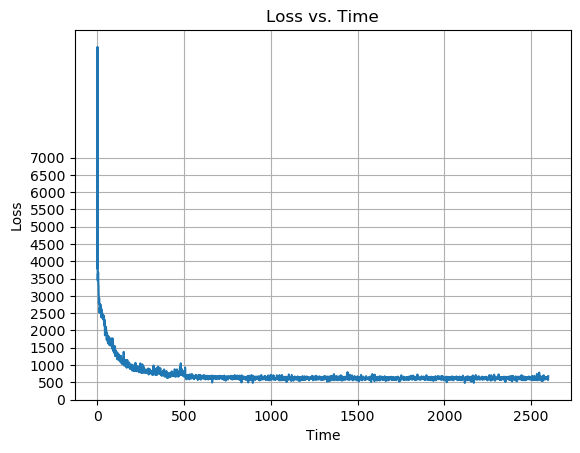

In [ ]:
### TODO: make plot of reconstruction loss (y-axis) over training time (x-axis)
time_intervals = list(range(len(losses)))
# plt.figure(figsize=(10, 6))
plt.plot(time_intervals,losses)
plt.title('Loss vs. Time')
plt.xlabel('Time')
plt.ylabel('Loss')
# plt.ylim(0, 7000)  # Adjust the values as needed

# plt.grid(True)
# plt.show()
custom_y_ticks = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000] # Define your custom y-axis tick values
plt.yticks(custom_y_ticks)

plt.grid(True)
plt.show()

## Evaluation

### Question 5: Reconstruct whole image (20 points)

For this part, reconstruct the image using your model's outputs, at each coordinate.
You can use our scaffolding code, or write your own.
For this part, we are just grading the image plot, where you should plot the original image side-by-side with the reconstruction, as shown in this example.

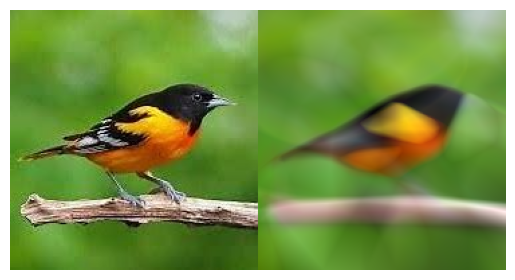

(-0.5, 447.5, 223.5, -0.5)

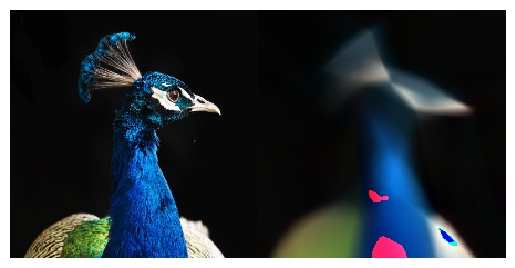

In [ ]:
### TODO: ~12 lines of code to assemble gt_image, build pred_image
###       from model
#evaluation
# load dataset
dataset = SingleImageDataset('/home/mayank/828i/HW2/mypeacock.jpg')
dataloader = DataLoader(dataset, batch_size=1024,shuffle=False)
ground_truth_image = torch.zeros((dataset.h,dataset.w,3),dtype=torch.uint8)
predicted_image = torch.zeros_like(ground_truth_image)
net.eval()
for batch in dataloader:
    position_x, positiony, intensity = batch["x"], batch["y"], batch["intensity"]
    x = position_x.to(device)
    y = positiony.to(device)
    #normalize 0 to 1
    x = x / dataset.w
    y = y / dataset.h
    coord = torch.vstack([x,y]).T
    pred = net(coord)
    #detach torch to numpy
    x = position_x.detach().numpy()
    y = positiony.detach().numpy()
    intensity = intensity.detach()
    pred_intensity = pred.type(torch.uint8).cpu().detach()
    #assign intensity to x,y positionsi., x,y to rgb
    for idx, (y1, x1) in enumerate(zip(y,x)):
        ground_truth_image[y1,x1,:] = intensity[idx]
        predicted_image[y1,x1,:] = pred_intensity[idx]

concat_image = torch.cat([ground_truth_image, predicted_image], dim=1)
plt.imshow(concat_image)
plt.axis('off')

### Question 6: Compute PSNR (10 points)

For this part, print the PSNR for your reconstruction vs. the original image. Feel free to use any libraries, or implement it from scratch.

In [ ]:
### TODO: compute and print PSNR between reconstructed (predicted) and ground truth images
import numpy as np

def psnr(ground_truth_image, pred_image):
    # Ensure the input images have the same shape and data type
    if ground_truth_image.shape != pred_image.shape:
        raise ValueError("Input images must have the same shape")

    # Calculate the mean squared error (MSE)
    # mse = np.mean((ground_truth_image - pred_image) ** 2)
    mse_red_channel = np.mean((ground_truth_image[:, :, 0] - pred_image[:, :, 0])**2)
    mse_green_channel = np.mean((ground_truth_image[:, :, 1] - pred_image[:, :, 1])**2)
    mse_blue_channel = np.mean((ground_truth_image[:, :, 2] - pred_image[:, :, 2])**2)

    # Maximum possible pixel value (assumes pixel values are in the range [0, 255])
    max_pixel_value = 255.0
    mse=mse_red_channel+mse_green_channel+mse_blue_channel
    # Calculate PSNR
    if mse == 0:
        return float('inf')
    psnr_value = 20 * np.log10(max_pixel_value / np.sqrt(mse))

    return psnr_value

ground_truth = ground_truth_image.numpy()
predict = predicted_image.numpy()
psnr_value = psnr(ground_truth, predict)
print("PSNR value: ", psnr_value)

PSNR value:  27.742275863610462


### Question 7: Outpainting (10 points)

INR is a continuous image representation. What happens if your input coordinates don't correspond to real pixels? Try it out and show the result!

For this part, have your model predict 20 pixels in all directions that are outside the boundaries of the original image, and show the resulting image below. Also plot a box around the region corresponding to the original image, for clarity.

We show an example below.

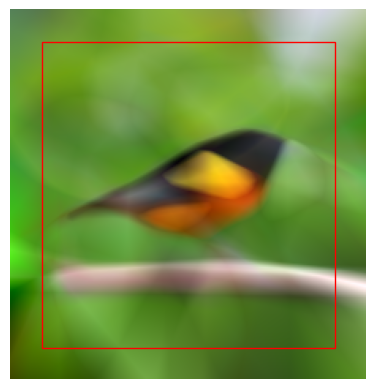

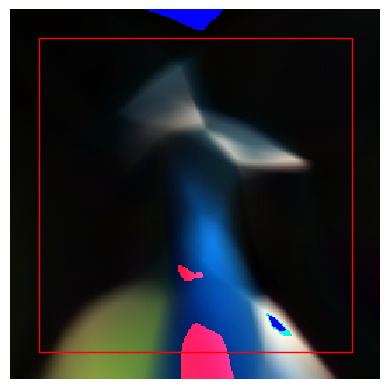

In [ ]:
import matplotlib.patches as patches

### TODO: 6-10 lines of code to generate outpainted image

height, width = dataset.h, dataset.w
outpaint_pix = 20
outpainted_image = np.pad(np.zeros((height, width, 3), dtype=np.uint8), ((outpaint_pix, outpaint_pix),(outpaint_pix, outpaint_pix), (0, 0)), mode="constant")

net.eval()
with torch.no_grad():
    for i in range(-outpaint_pix, height + outpaint_pix):
        coords = []
        for j in range(-outpaint_pix, width + outpaint_pix):
            y = torch.tensor(i / height).to(device)
            x = torch.tensor(j / width).to(device)
            coords.append([x, y])
            cat = torch.tensor(coords).float().to(device)

            pred = net(cat).type(torch.uint8).cpu().detach().numpy()

        for k in range(pred.shape[0]):
            outpainted_image[i + outpaint_pix, k] = pred[k]

fig, ax = plt.subplots()
ax.imshow(outpainted_image)

rect = patches.Rectangle((20, 20), dataset.w, dataset.h, linewidth=1,edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.axis('off')
plt.show()


## Bonus

The main idea of the bonus is to do something to make your model better than the one we walk you through in the assignment. Be creative! You can receive a maximum of 20 points for this portion.

### Question 8: Improve the Reconstruction Quality of the System (20 points, optional)

For this question, you must do two things:

1. Make a non-trivial change from what we guided you through in the assignment.
2. Prove that the change improves reconstruction quality. Compare your new output/PSNR to the old output/PSNR (plot the images, print the PSNR).

If you can't think of your own idea, revisit some of the literature from Shishira's guest lectures. For example, instead of taking raw coordinate inputs, you could try using positional encodings.

In [ ]:
### TODO: bonus
import math
def pose_encod(B, x):
        #postional feature mapping of input
        X_proj= 2 * torch.pi * torch.matmul(x, B.T)
        cos = torch.cos(X_proj)
        sin = torch.sin(X_proj)
        out=torch.cat([cos, sin], dim=-1)
        return out

dataset = SingleImageDataset('/home/mayank/828i/HW2/mypeacock.jpg')
dataloader = DataLoader(dataset, batch_size=4096,shuffle=False)
m=100
B = 10*torch.randn(m,2).to(device)
new_network=FFN(number_input=m * 2)
new_network=new_network.to(device)
criterion = torch.nn.MSELoss()

### TODO: 2 lines of code for optimizer, number of epochs
optimizer = torch.optim.Adam(new_network.parameters(),lr=1e-3)
#Reduce learning rate when a metric has stopped improving
scheduler = ReduceLROnPlateau(optimizer, factor=0.1, patience=5, verbose=True)
NUM_EPOCHS = 200
losses=[]
### TODO: set up mechanism for storing loss values
for epoch in tqdm(range(NUM_EPOCHS)):
      starting_time = time.time()
      list_losses = []
      running_corrects=0
      n_sample = 0
      for batch in dataloader:
            x, y, actual = batch["x"], batch["y"], batch["intensity"]
            #USIng GPU so moving data to device
            x = x.to(device)
            y = y.to(device)
            actual = actual.float().to(device)
            #normalize from 0 to 1
            x = x / dataset.w
            y = y / dataset.h
            ### TODO: 3 lines of code to assemble coord from x and y, pass to net,
            ###       compute loss
            coord =torch.vstack([x, y]).T
            positional_coord=pose_encod(B,coord)
            pred = new_network(positional_coord)
            loss =criterion(pred, actual)
            list_losses.append(loss.item())
            optimizer.zero_grad()

            loss.backward()
            optimizer.step()
            ### TODO: track loss
            losses.append(loss.item())
      # data.set_description(f'Epoch [{epoch}/{NUM_EPOCHS}]')
      # data.set_postfix(acc=(running_corrects/n_sample).item())
      average_loss = sum(list_losses)/len(list_losses)
      scheduler.step(average_loss)
      time_diff = time.time() - starting_time

      print("Epoch: [{}/{}] Time: {}min:{}sec Loss: {:.4f}".format(epoch, NUM_EPOCHS, time_diff//60, time_diff%60, average_loss))

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 1/200 [00:01<05:46,  1.74s/it]

Epoch: [0/200] Time: 0.0min:1.7427978515625sec Loss: 2974.4811


  1%|          | 2/200 [00:03<05:16,  1.60s/it]

Epoch: [1/200] Time: 0.0min:1.4982709884643555sec Loss: 3275.1451


  2%|▏         | 3/200 [00:04<04:58,  1.51s/it]

Epoch: [2/200] Time: 0.0min:1.4089415073394775sec Loss: 3150.8341


  2%|▏         | 4/200 [00:06<04:57,  1.52s/it]

Epoch: [3/200] Time: 0.0min:1.5246145725250244sec Loss: 2635.3795


  2%|▎         | 5/200 [00:07<04:55,  1.52s/it]

Epoch: [4/200] Time: 0.0min:1.5162413120269775sec Loss: 2682.4155


  3%|▎         | 6/200 [00:08<04:38,  1.43s/it]

Epoch: [5/200] Time: 0.0min:1.269592046737671sec Loss: 2348.7221


  4%|▎         | 7/200 [00:10<04:29,  1.39s/it]

Epoch: [6/200] Time: 0.0min:1.3126013278961182sec Loss: 2303.3206


  4%|▍         | 8/200 [00:11<04:17,  1.34s/it]

Epoch: [7/200] Time: 0.0min:1.2222528457641602sec Loss: 2160.1987


  4%|▍         | 9/200 [00:12<04:13,  1.33s/it]

Epoch: [8/200] Time: 0.0min:1.3060693740844727sec Loss: 2071.4505


  5%|▌         | 10/200 [00:14<04:13,  1.33s/it]

Epoch: [9/200] Time: 0.0min:1.3406195640563965sec Loss: 1956.5598


  6%|▌         | 11/200 [00:15<04:04,  1.30s/it]

Epoch: [10/200] Time: 0.0min:1.209822177886963sec Loss: 1826.1366


  6%|▌         | 12/200 [00:16<04:03,  1.30s/it]

Epoch: [11/200] Time: 0.0min:1.3009254932403564sec Loss: 1662.6300


  6%|▋         | 13/200 [00:17<04:02,  1.30s/it]

Epoch: [12/200] Time: 0.0min:1.2903878688812256sec Loss: 1448.4232


  7%|▋         | 14/200 [00:19<03:58,  1.28s/it]

Epoch: [13/200] Time: 0.0min:1.246321678161621sec Loss: 1191.3132


  8%|▊         | 15/200 [00:20<03:58,  1.29s/it]

Epoch: [14/200] Time: 0.0min:1.31614089012146sec Loss: 925.5438


  8%|▊         | 16/200 [00:21<03:54,  1.27s/it]

Epoch: [15/200] Time: 0.0min:1.2319741249084473sec Loss: 765.7896


  8%|▊         | 17/200 [00:23<03:54,  1.28s/it]

Epoch: [16/200] Time: 0.0min:1.299997329711914sec Loss: 740.4243


  9%|▉         | 18/200 [00:24<03:55,  1.29s/it]

Epoch: [17/200] Time: 0.0min:1.3227298259735107sec Loss: 891.2215


 10%|▉         | 19/200 [00:25<03:51,  1.28s/it]

Epoch: [18/200] Time: 0.0min:1.2356178760528564sec Loss: 919.8187


 10%|█         | 20/200 [00:26<03:51,  1.29s/it]

Epoch: [19/200] Time: 0.0min:1.3053998947143555sec Loss: 2099.5597


 10%|█         | 21/200 [00:28<03:47,  1.27s/it]

Epoch: [20/200] Time: 0.0min:1.2342610359191895sec Loss: 1208.6805


 11%|█         | 22/200 [00:29<03:49,  1.29s/it]

Epoch: [21/200] Time: 0.0min:1.3338801860809326sec Loss: 1600.8677


 12%|█▏        | 23/200 [00:30<03:48,  1.29s/it]

Epoch 00023: reducing learning rate of group 0 to 1.0000e-04.
Epoch: [22/200] Time: 0.0min:1.2978122234344482sec Loss: 803.4293


 12%|█▏        | 24/200 [00:31<03:42,  1.27s/it]

Epoch: [23/200] Time: 0.0min:1.2030253410339355sec Loss: 700.4204


 12%|█▎        | 25/200 [00:33<03:43,  1.28s/it]

Epoch: [24/200] Time: 0.0min:1.2987799644470215sec Loss: 674.5855


 13%|█▎        | 26/200 [00:34<03:38,  1.25s/it]

Epoch: [25/200] Time: 0.0min:1.1992027759552002sec Loss: 655.6775


 14%|█▎        | 27/200 [00:35<03:39,  1.27s/it]

Epoch: [26/200] Time: 0.0min:1.30946683883667sec Loss: 647.0213


 14%|█▍        | 28/200 [00:37<03:39,  1.27s/it]

Epoch: [27/200] Time: 0.0min:1.2801744937896729sec Loss: 640.5992


 14%|█▍        | 29/200 [00:38<03:35,  1.26s/it]

Epoch: [28/200] Time: 0.0min:1.2325730323791504sec Loss: 634.7182


 15%|█▌        | 30/200 [00:39<03:37,  1.28s/it]

Epoch: [29/200] Time: 0.0min:1.316725492477417sec Loss: 629.5478


 16%|█▌        | 31/200 [00:40<03:37,  1.29s/it]

Epoch: [30/200] Time: 0.0min:1.3098535537719727sec Loss: 624.9704


 16%|█▌        | 32/200 [00:42<03:33,  1.27s/it]

Epoch: [31/200] Time: 0.0min:1.2290334701538086sec Loss: 620.8535


 16%|█▋        | 33/200 [00:43<03:33,  1.28s/it]

Epoch: [32/200] Time: 0.0min:1.298947811126709sec Loss: 617.1147


 17%|█▋        | 34/200 [00:44<03:29,  1.26s/it]

Epoch: [33/200] Time: 0.0min:1.2183387279510498sec Loss: 613.6894


 18%|█▊        | 35/200 [00:46<03:31,  1.28s/it]

Epoch: [34/200] Time: 0.0min:1.3245604038238525sec Loss: 610.5249


 18%|█▊        | 36/200 [00:47<03:30,  1.28s/it]

Epoch: [35/200] Time: 0.0min:1.286987543106079sec Loss: 607.5801


 18%|█▊        | 37/200 [00:48<03:26,  1.27s/it]

Epoch: [36/200] Time: 0.0min:1.2354052066802979sec Loss: 604.8224


 19%|█▉        | 38/200 [00:49<03:27,  1.28s/it]

Epoch: [37/200] Time: 0.0min:1.3098139762878418sec Loss: 602.2205


 20%|█▉        | 39/200 [00:51<03:28,  1.29s/it]

Epoch: [38/200] Time: 0.0min:1.3237278461456299sec Loss: 599.7540


 20%|██        | 40/200 [00:52<03:24,  1.28s/it]

Epoch: [39/200] Time: 0.0min:1.2301316261291504sec Loss: 597.4043


 20%|██        | 41/200 [00:53<03:23,  1.28s/it]

Epoch: [40/200] Time: 0.0min:1.2861499786376953sec Loss: 595.1591


 21%|██        | 42/200 [00:54<03:19,  1.26s/it]

Epoch: [41/200] Time: 0.0min:1.2208385467529297sec Loss: 593.0094


 22%|██▏       | 43/200 [00:56<03:19,  1.27s/it]

Epoch: [42/200] Time: 0.0min:1.292262077331543sec Loss: 590.9369


 22%|██▏       | 44/200 [00:57<03:19,  1.28s/it]

Epoch: [43/200] Time: 0.0min:1.2922043800354004sec Loss: 588.9257


 22%|██▎       | 45/200 [00:58<03:15,  1.26s/it]

Epoch: [44/200] Time: 0.0min:1.2132360935211182sec Loss: 586.9665


 23%|██▎       | 46/200 [01:00<03:16,  1.27s/it]

Epoch: [45/200] Time: 0.0min:1.3101844787597656sec Loss: 585.0463


 24%|██▎       | 47/200 [01:01<03:12,  1.26s/it]

Epoch: [46/200] Time: 0.0min:1.2220079898834229sec Loss: 583.1513


 24%|██▍       | 48/200 [01:02<03:14,  1.28s/it]

Epoch: [47/200] Time: 0.0min:1.3253684043884277sec Loss: 581.2780


 24%|██▍       | 49/200 [01:03<03:15,  1.29s/it]

Epoch: [48/200] Time: 0.0min:1.3240361213684082sec Loss: 579.4236


 25%|██▌       | 50/200 [01:05<03:11,  1.27s/it]

Epoch: [49/200] Time: 0.0min:1.2304840087890625sec Loss: 577.5861


 26%|██▌       | 51/200 [01:06<03:10,  1.28s/it]

Epoch: [50/200] Time: 0.0min:1.2955341339111328sec Loss: 575.7548


 26%|██▌       | 52/200 [01:07<03:06,  1.26s/it]

Epoch: [51/200] Time: 0.0min:1.2179217338562012sec Loss: 573.9266


 26%|██▋       | 53/200 [01:08<03:08,  1.29s/it]

Epoch: [52/200] Time: 0.0min:1.3382611274719238sec Loss: 572.0996


 27%|██▋       | 54/200 [01:10<03:08,  1.29s/it]

Epoch: [53/200] Time: 0.0min:1.3149540424346924sec Loss: 570.2718


 28%|██▊       | 55/200 [01:11<03:05,  1.28s/it]

Epoch: [54/200] Time: 0.0min:1.2326421737670898sec Loss: 568.4394


 28%|██▊       | 56/200 [01:12<03:05,  1.29s/it]

Epoch: [55/200] Time: 0.0min:1.3083839416503906sec Loss: 566.5980


 28%|██▊       | 57/200 [01:14<03:04,  1.29s/it]

Epoch: [56/200] Time: 0.0min:1.3020331859588623sec Loss: 564.7445


 29%|██▉       | 58/200 [01:15<03:00,  1.27s/it]

Epoch: [57/200] Time: 0.0min:1.2339701652526855sec Loss: 562.8739


 30%|██▉       | 59/200 [01:16<03:00,  1.28s/it]

Epoch: [58/200] Time: 0.0min:1.2904515266418457sec Loss: 560.9832


 30%|███       | 60/200 [01:17<02:58,  1.27s/it]

Epoch: [59/200] Time: 0.0min:1.2544572353363037sec Loss: 559.0688


 30%|███       | 61/200 [01:19<02:58,  1.28s/it]

Epoch: [60/200] Time: 0.0min:1.3080344200134277sec Loss: 557.1261


 31%|███       | 62/200 [01:20<02:57,  1.29s/it]

Epoch: [61/200] Time: 0.0min:1.303426742553711sec Loss: 555.1502


 32%|███▏      | 63/200 [01:21<02:54,  1.27s/it]

Epoch: [62/200] Time: 0.0min:1.2301275730133057sec Loss: 553.1372


 32%|███▏      | 64/200 [01:23<02:54,  1.28s/it]

Epoch: [63/200] Time: 0.0min:1.3126389980316162sec Loss: 551.0828


 32%|███▎      | 65/200 [01:24<02:54,  1.29s/it]

Epoch: [64/200] Time: 0.0min:1.3059072494506836sec Loss: 548.9819


 33%|███▎      | 66/200 [01:25<02:49,  1.27s/it]

Epoch: [65/200] Time: 0.0min:1.2102551460266113sec Loss: 546.8299


 34%|███▎      | 67/200 [01:26<02:49,  1.27s/it]

Epoch: [66/200] Time: 0.0min:1.2883317470550537sec Loss: 544.6213


 34%|███▍      | 68/200 [01:28<02:46,  1.26s/it]

Epoch: [67/200] Time: 0.0min:1.221069097518921sec Loss: 542.3493


 34%|███▍      | 69/200 [01:29<02:46,  1.27s/it]

Epoch: [68/200] Time: 0.0min:1.2906253337860107sec Loss: 540.0037


 35%|███▌      | 70/200 [01:30<02:46,  1.28s/it]

Epoch: [69/200] Time: 0.0min:1.301523208618164sec Loss: 537.5840


 36%|███▌      | 71/200 [01:31<02:42,  1.26s/it]

Epoch: [70/200] Time: 0.0min:1.2139546871185303sec Loss: 535.0850


 36%|███▌      | 72/200 [01:33<02:42,  1.27s/it]

Epoch: [71/200] Time: 0.0min:1.297961950302124sec Loss: 532.5001


 36%|███▋      | 73/200 [01:34<02:39,  1.25s/it]

Epoch: [72/200] Time: 0.0min:1.2153141498565674sec Loss: 529.8231


 37%|███▋      | 74/200 [01:35<02:41,  1.28s/it]

Epoch: [73/200] Time: 0.0min:1.3392670154571533sec Loss: 527.0457


 38%|███▊      | 75/200 [01:37<02:40,  1.28s/it]

Epoch: [74/200] Time: 0.0min:1.2885029315948486sec Loss: 524.1603


 38%|███▊      | 76/200 [01:38<02:36,  1.26s/it]

Epoch: [75/200] Time: 0.0min:1.213299036026001sec Loss: 521.1585


 38%|███▊      | 77/200 [01:39<02:36,  1.27s/it]

Epoch: [76/200] Time: 0.0min:1.2874870300292969sec Loss: 518.0323


 39%|███▉      | 78/200 [01:40<02:33,  1.26s/it]

Epoch: [77/200] Time: 0.0min:1.2262697219848633sec Loss: 514.7722


 40%|███▉      | 79/200 [01:42<02:35,  1.28s/it]

Epoch: [78/200] Time: 0.0min:1.3421630859375sec Loss: 511.3680


 40%|████      | 80/200 [01:43<02:33,  1.28s/it]

Epoch: [79/200] Time: 0.0min:1.275651216506958sec Loss: 507.8085


 40%|████      | 81/200 [01:44<02:29,  1.26s/it]

Epoch: [80/200] Time: 0.0min:1.2079830169677734sec Loss: 504.0798


 41%|████      | 82/200 [01:45<02:29,  1.27s/it]

Epoch: [81/200] Time: 0.0min:1.2913694381713867sec Loss: 500.1639


 42%|████▏     | 83/200 [01:47<02:29,  1.28s/it]

Epoch: [82/200] Time: 0.0min:1.302267074584961sec Loss: 496.0573


 42%|████▏     | 84/200 [01:48<02:26,  1.26s/it]

Epoch: [83/200] Time: 0.0min:1.218324899673462sec Loss: 491.7439


 42%|████▎     | 85/200 [01:49<02:26,  1.27s/it]

Epoch: [84/200] Time: 0.0min:1.288139820098877sec Loss: 487.2058


 43%|████▎     | 86/200 [01:50<02:22,  1.25s/it]

Epoch: [85/200] Time: 0.0min:1.2076430320739746sec Loss: 482.4234


 44%|████▎     | 87/200 [01:52<02:22,  1.26s/it]

Epoch: [86/200] Time: 0.0min:1.2709119319915771sec Loss: 477.3794


 44%|████▍     | 88/200 [01:53<02:21,  1.27s/it]

Epoch: [87/200] Time: 0.0min:1.290390968322754sec Loss: 472.0588


 44%|████▍     | 89/200 [01:54<02:18,  1.25s/it]

Epoch: [88/200] Time: 0.0min:1.210803747177124sec Loss: 466.4487


 45%|████▌     | 90/200 [01:56<02:19,  1.27s/it]

Epoch: [89/200] Time: 0.0min:1.3170347213745117sec Loss: 460.5393


 46%|████▌     | 91/200 [01:57<02:19,  1.28s/it]

Epoch: [90/200] Time: 0.0min:1.2973730564117432sec Loss: 454.3201


 46%|████▌     | 92/200 [01:58<02:16,  1.26s/it]

Epoch: [91/200] Time: 0.0min:1.2177796363830566sec Loss: 447.7756


 46%|████▋     | 93/200 [01:59<02:15,  1.26s/it]

Epoch: [92/200] Time: 0.0min:1.264754056930542sec Loss: 440.8761


 47%|████▋     | 94/200 [02:01<02:11,  1.24s/it]

Epoch: [93/200] Time: 0.0min:1.1998379230499268sec Loss: 433.1580


 48%|████▊     | 95/200 [02:02<02:11,  1.26s/it]

Epoch: [94/200] Time: 0.0min:1.2827372550964355sec Loss: 424.3900


 48%|████▊     | 96/200 [02:03<02:12,  1.27s/it]

Epoch: [95/200] Time: 0.0min:1.3066127300262451sec Loss: 415.3480


 48%|████▊     | 97/200 [02:04<02:09,  1.26s/it]

Epoch: [96/200] Time: 0.0min:1.2191822528839111sec Loss: 406.2955


 49%|████▉     | 98/200 [02:06<02:08,  1.26s/it]

Epoch: [97/200] Time: 0.0min:1.2744534015655518sec Loss: 396.4900


 50%|████▉     | 99/200 [02:07<02:06,  1.25s/it]

Epoch: [98/200] Time: 0.0min:1.2282438278198242sec Loss: 385.6978


 50%|█████     | 100/200 [02:08<02:11,  1.31s/it]

Epoch: [99/200] Time: 0.0min:1.4474236965179443sec Loss: 374.2854


 50%|█████     | 101/200 [02:10<02:09,  1.31s/it]

Epoch: [100/200] Time: 0.0min:1.2903926372528076sec Loss: 363.0812


 51%|█████     | 102/200 [02:11<02:04,  1.27s/it]

Epoch: [101/200] Time: 0.0min:1.2009873390197754sec Loss: 352.1802


 52%|█████▏    | 103/200 [02:12<02:03,  1.28s/it]

Epoch: [102/200] Time: 0.0min:1.282956600189209sec Loss: 341.0694


 52%|█████▏    | 104/200 [02:13<02:00,  1.25s/it]

Epoch: [103/200] Time: 0.0min:1.1934986114501953sec Loss: 330.1079


 52%|█████▎    | 105/200 [02:15<01:59,  1.26s/it]

Epoch: [104/200] Time: 0.0min:1.2709932327270508sec Loss: 319.3910


 53%|█████▎    | 106/200 [02:16<01:59,  1.27s/it]

Epoch: [105/200] Time: 0.0min:1.3101913928985596sec Loss: 308.6783


 54%|█████▎    | 107/200 [02:17<01:56,  1.25s/it]

Epoch: [106/200] Time: 0.0min:1.205622673034668sec Loss: 298.7600


 54%|█████▍    | 108/200 [02:18<01:57,  1.28s/it]

Epoch: [107/200] Time: 0.0min:1.3337504863739014sec Loss: 289.7524


 55%|█████▍    | 109/200 [02:20<01:56,  1.28s/it]

Epoch: [108/200] Time: 0.0min:1.2871501445770264sec Loss: 281.5399


 55%|█████▌    | 110/200 [02:21<01:53,  1.26s/it]

Epoch: [109/200] Time: 0.0min:1.2137336730957031sec Loss: 273.9535


 56%|█████▌    | 111/200 [02:22<01:52,  1.26s/it]

Epoch: [110/200] Time: 0.0min:1.2632184028625488sec Loss: 267.0121


 56%|█████▌    | 112/200 [02:23<01:49,  1.24s/it]

Epoch: [111/200] Time: 0.0min:1.1973202228546143sec Loss: 260.7129


 56%|█████▋    | 113/200 [02:25<01:49,  1.26s/it]

Epoch: [112/200] Time: 0.0min:1.2861385345458984sec Loss: 255.0085


 57%|█████▋    | 114/200 [02:26<01:48,  1.26s/it]

Epoch: [113/200] Time: 0.0min:1.2689950466156006sec Loss: 249.8469


 57%|█████▊    | 115/200 [02:27<01:45,  1.24s/it]

Epoch: [114/200] Time: 0.0min:1.18387770652771sec Loss: 245.1734


 58%|█████▊    | 116/200 [02:28<01:44,  1.25s/it]

Epoch: [115/200] Time: 0.0min:1.2724099159240723sec Loss: 240.9404


 58%|█████▊    | 117/200 [02:30<01:44,  1.26s/it]

Epoch: [116/200] Time: 0.0min:1.27262544631958sec Loss: 237.0801


 59%|█████▉    | 118/200 [02:31<01:41,  1.24s/it]

Epoch: [117/200] Time: 0.0min:1.2056198120117188sec Loss: 233.5669


 60%|█████▉    | 119/200 [02:32<01:44,  1.30s/it]

Epoch: [118/200] Time: 0.0min:1.4205844402313232sec Loss: 230.3337


 60%|██████    | 120/200 [02:34<01:42,  1.28s/it]

Epoch: [119/200] Time: 0.0min:1.2375364303588867sec Loss: 227.3694


 60%|██████    | 121/200 [02:35<01:40,  1.28s/it]

Epoch: [120/200] Time: 0.0min:1.273167371749878sec Loss: 224.6187


 61%|██████    | 122/200 [02:36<01:39,  1.28s/it]

Epoch: [121/200] Time: 0.0min:1.2741751670837402sec Loss: 222.0650


 62%|██████▏   | 123/200 [02:37<01:36,  1.26s/it]

Epoch: [122/200] Time: 0.0min:1.2145836353302002sec Loss: 219.6846


 62%|██████▏   | 124/200 [02:39<01:36,  1.27s/it]

Epoch: [123/200] Time: 0.0min:1.2964820861816406sec Loss: 217.4476


 62%|██████▎   | 125/200 [02:40<01:33,  1.25s/it]

Epoch: [124/200] Time: 0.0min:1.2019431591033936sec Loss: 215.3519


 63%|██████▎   | 126/200 [02:41<01:35,  1.29s/it]

Epoch: [125/200] Time: 0.0min:1.3886723518371582sec Loss: 213.3714


 64%|██████▎   | 127/200 [02:42<01:34,  1.29s/it]

Epoch: [126/200] Time: 0.0min:1.2843408584594727sec Loss: 211.5021


 64%|██████▍   | 128/200 [02:44<01:30,  1.26s/it]

Epoch: [127/200] Time: 0.0min:1.1940488815307617sec Loss: 209.7258


 64%|██████▍   | 129/200 [02:45<01:29,  1.27s/it]

Epoch: [128/200] Time: 0.0min:1.2729334831237793sec Loss: 208.0366


 65%|██████▌   | 130/200 [02:46<01:27,  1.25s/it]

Epoch: [129/200] Time: 0.0min:1.2024734020233154sec Loss: 206.4273


 66%|██████▌   | 131/200 [02:48<01:28,  1.29s/it]

Epoch: [130/200] Time: 0.0min:1.3891565799713135sec Loss: 204.8873


 66%|██████▌   | 132/200 [02:49<01:27,  1.29s/it]

Epoch: [131/200] Time: 0.0min:1.2866888046264648sec Loss: 203.4128


 66%|██████▋   | 133/200 [02:50<01:24,  1.26s/it]

Epoch: [132/200] Time: 0.0min:1.1945040225982666sec Loss: 201.9953


 67%|██████▋   | 134/200 [02:51<01:25,  1.30s/it]

Epoch: [133/200] Time: 0.0min:1.382659673690796sec Loss: 200.6312


 68%|██████▊   | 135/200 [02:53<01:23,  1.29s/it]

Epoch: [134/200] Time: 0.0min:1.2713241577148438sec Loss: 199.3131


 68%|██████▊   | 136/200 [02:54<01:20,  1.26s/it]

Epoch: [135/200] Time: 0.0min:1.2042100429534912sec Loss: 198.0384


 68%|██████▊   | 137/200 [02:55<01:20,  1.27s/it]

Epoch: [136/200] Time: 0.0min:1.2846307754516602sec Loss: 196.8030


 69%|██████▉   | 138/200 [02:56<01:17,  1.25s/it]

Epoch: [137/200] Time: 0.0min:1.2096130847930908sec Loss: 195.6030


 70%|██████▉   | 139/200 [02:58<01:16,  1.26s/it]

Epoch: [138/200] Time: 0.0min:1.274320125579834sec Loss: 194.4368


 70%|███████   | 140/200 [02:59<01:17,  1.29s/it]

Epoch: [139/200] Time: 0.0min:1.3674194812774658sec Loss: 193.3013


 70%|███████   | 141/200 [03:00<01:14,  1.26s/it]

Epoch: [140/200] Time: 0.0min:1.1901648044586182sec Loss: 192.1931


 71%|███████   | 142/200 [03:01<01:13,  1.26s/it]

Epoch: [141/200] Time: 0.0min:1.2646498680114746sec Loss: 191.1095


 72%|███████▏  | 143/200 [03:03<01:12,  1.28s/it]

Epoch: [142/200] Time: 0.0min:1.316335678100586sec Loss: 190.0491


 72%|███████▏  | 144/200 [03:04<01:10,  1.26s/it]

Epoch: [143/200] Time: 0.0min:1.2043042182922363sec Loss: 189.0089


 72%|███████▎  | 145/200 [03:05<01:09,  1.26s/it]

Epoch: [144/200] Time: 0.0min:1.2726287841796875sec Loss: 187.9878


 73%|███████▎  | 146/200 [03:06<01:07,  1.25s/it]

Epoch: [145/200] Time: 0.0min:1.2291591167449951sec Loss: 186.9837


 74%|███████▎  | 147/200 [03:08<01:06,  1.26s/it]

Epoch: [146/200] Time: 0.0min:1.271831750869751sec Loss: 185.9943


 74%|███████▍  | 148/200 [03:09<01:07,  1.29s/it]

Epoch: [147/200] Time: 0.0min:1.3762750625610352sec Loss: 185.0184


 74%|███████▍  | 149/200 [03:10<01:05,  1.28s/it]

Epoch: [148/200] Time: 0.0min:1.2451417446136475sec Loss: 184.0554


 75%|███████▌  | 150/200 [03:12<01:04,  1.30s/it]

Epoch: [149/200] Time: 0.0min:1.3312408924102783sec Loss: 183.1060


 76%|███████▌  | 151/200 [03:13<01:01,  1.26s/it]

Epoch: [150/200] Time: 0.0min:1.1869323253631592sec Loss: 182.1707


 76%|███████▌  | 152/200 [03:14<01:01,  1.28s/it]

Epoch: [151/200] Time: 0.0min:1.306957721710205sec Loss: 181.2493


 76%|███████▋  | 153/200 [03:15<01:00,  1.28s/it]

Epoch: [152/200] Time: 0.0min:1.2893788814544678sec Loss: 180.3398


 77%|███████▋  | 154/200 [03:17<00:57,  1.25s/it]

Epoch: [153/200] Time: 0.0min:1.1904728412628174sec Loss: 179.4437


 78%|███████▊  | 155/200 [03:18<00:56,  1.26s/it]

Epoch: [154/200] Time: 0.0min:1.2740991115570068sec Loss: 178.5616


 78%|███████▊  | 156/200 [03:19<00:54,  1.25s/it]

Epoch: [155/200] Time: 0.0min:1.2131531238555908sec Loss: 177.6906


 78%|███████▊  | 157/200 [03:20<00:54,  1.26s/it]

Epoch: [156/200] Time: 0.0min:1.2793021202087402sec Loss: 176.8317


 79%|███████▉  | 158/200 [03:22<00:52,  1.26s/it]

Epoch: [157/200] Time: 0.0min:1.268425703048706sec Loss: 175.9839


 80%|███████▉  | 159/200 [03:23<00:50,  1.24s/it]

Epoch: [158/200] Time: 0.0min:1.1913971900939941sec Loss: 175.1469


 80%|████████  | 160/200 [03:24<00:50,  1.25s/it]

Epoch: [159/200] Time: 0.0min:1.275521993637085sec Loss: 174.3188


 80%|████████  | 161/200 [03:25<00:49,  1.26s/it]

Epoch: [160/200] Time: 0.0min:1.2937901020050049sec Loss: 173.4981


 81%|████████  | 162/200 [03:27<00:47,  1.25s/it]

Epoch: [161/200] Time: 0.0min:1.2046983242034912sec Loss: 172.6852


 82%|████████▏ | 163/200 [03:28<00:46,  1.26s/it]

Epoch: [162/200] Time: 0.0min:1.2876191139221191sec Loss: 171.8804


 82%|████████▏ | 164/200 [03:29<00:44,  1.24s/it]

Epoch: [163/200] Time: 0.0min:1.195620059967041sec Loss: 171.0831


 82%|████████▎ | 165/200 [03:30<00:43,  1.25s/it]

Epoch: [164/200] Time: 0.0min:1.2684600353240967sec Loss: 170.2937


 83%|████████▎ | 166/200 [03:32<00:42,  1.26s/it]

Epoch: [165/200] Time: 0.0min:1.2742340564727783sec Loss: 169.5099


 84%|████████▎ | 167/200 [03:33<00:41,  1.24s/it]

Epoch: [166/200] Time: 0.0min:1.2153241634368896sec Loss: 168.7339


 84%|████████▍ | 168/200 [03:34<00:40,  1.26s/it]

Epoch: [167/200] Time: 0.0min:1.2858643531799316sec Loss: 167.9618


 84%|████████▍ | 169/200 [03:36<00:39,  1.26s/it]

Epoch: [168/200] Time: 0.0min:1.2677109241485596sec Loss: 167.1965


 85%|████████▌ | 170/200 [03:37<00:37,  1.24s/it]

Epoch: [169/200] Time: 0.0min:1.202204704284668sec Loss: 166.4321


 86%|████████▌ | 171/200 [03:38<00:36,  1.25s/it]

Epoch: [170/200] Time: 0.0min:1.2692067623138428sec Loss: 165.6753


 86%|████████▌ | 172/200 [03:39<00:34,  1.23s/it]

Epoch: [171/200] Time: 0.0min:1.191143274307251sec Loss: 164.9169


 86%|████████▋ | 173/200 [03:40<00:33,  1.24s/it]

Epoch: [172/200] Time: 0.0min:1.2661230564117432sec Loss: 164.1681


 87%|████████▋ | 174/200 [03:42<00:32,  1.26s/it]

Epoch: [173/200] Time: 0.0min:1.2980389595031738sec Loss: 163.4138


 88%|████████▊ | 175/200 [03:43<00:31,  1.25s/it]

Epoch: [174/200] Time: 0.0min:1.2218079566955566sec Loss: 162.6757


 88%|████████▊ | 176/200 [03:44<00:30,  1.26s/it]

Epoch: [175/200] Time: 0.0min:1.2843384742736816sec Loss: 161.9247


 88%|████████▊ | 177/200 [03:45<00:28,  1.24s/it]

Epoch: [176/200] Time: 0.0min:1.2018487453460693sec Loss: 161.2050


 89%|████████▉ | 178/200 [03:47<00:27,  1.26s/it]

Epoch: [177/200] Time: 0.0min:1.2947509288787842sec Loss: 160.4596


 90%|████████▉ | 179/200 [03:48<00:26,  1.27s/it]

Epoch: [178/200] Time: 0.0min:1.2956128120422363sec Loss: 159.7813


 90%|█████████ | 180/200 [03:49<00:25,  1.25s/it]

Epoch: [179/200] Time: 0.0min:1.217066764831543sec Loss: 159.0601


 90%|█████████ | 181/200 [03:51<00:24,  1.27s/it]

Epoch: [180/200] Time: 0.0min:1.2924582958221436sec Loss: 158.5062


 91%|█████████ | 182/200 [03:52<00:22,  1.25s/it]

Epoch: [181/200] Time: 0.0min:1.2136938571929932sec Loss: 157.9112


 92%|█████████▏| 183/200 [03:53<00:21,  1.28s/it]

Epoch: [182/200] Time: 0.0min:1.3438160419464111sec Loss: 157.7935


 92%|█████████▏| 184/200 [03:54<00:20,  1.28s/it]

Epoch: [183/200] Time: 0.0min:1.290787696838379sec Loss: 157.8097


 92%|█████████▎| 185/200 [03:56<00:18,  1.26s/it]

Epoch: [184/200] Time: 0.0min:1.2104368209838867sec Loss: 159.3953


 93%|█████████▎| 186/200 [03:57<00:17,  1.27s/it]

Epoch: [185/200] Time: 0.0min:1.2847487926483154sec Loss: 162.0350


 94%|█████████▎| 187/200 [03:58<00:16,  1.27s/it]

Epoch: [186/200] Time: 0.0min:1.2786133289337158sec Loss: 170.1410


 94%|█████████▍| 188/200 [03:59<00:15,  1.25s/it]

Epoch: [187/200] Time: 0.0min:1.2129898071289062sec Loss: 180.9247


 94%|█████████▍| 189/200 [04:01<00:13,  1.27s/it]

Epoch 00189: reducing learning rate of group 0 to 1.0000e-05.
Epoch: [188/200] Time: 0.0min:1.3106403350830078sec Loss: 207.3050


 95%|█████████▌| 190/200 [04:02<00:12,  1.25s/it]

Epoch: [189/200] Time: 0.0min:1.2084012031555176sec Loss: 203.3927


 96%|█████████▌| 191/200 [04:03<00:11,  1.26s/it]

Epoch: [190/200] Time: 0.0min:1.2781314849853516sec Loss: 173.9050


 96%|█████████▌| 192/200 [04:04<00:10,  1.27s/it]

Epoch: [191/200] Time: 0.0min:1.2816367149353027sec Loss: 157.3306


 96%|█████████▋| 193/200 [04:06<00:08,  1.25s/it]

Epoch: [192/200] Time: 0.0min:1.2107973098754883sec Loss: 153.3532


 97%|█████████▋| 194/200 [04:07<00:07,  1.28s/it]

Epoch: [193/200] Time: 0.0min:1.3276481628417969sec Loss: 152.8113


 98%|█████████▊| 195/200 [04:08<00:06,  1.28s/it]

Epoch: [194/200] Time: 0.0min:1.2829699516296387sec Loss: 152.6839


 98%|█████████▊| 196/200 [04:10<00:05,  1.26s/it]

Epoch: [195/200] Time: 0.0min:1.2070226669311523sec Loss: 152.5651


 98%|█████████▊| 197/200 [04:11<00:03,  1.27s/it]

Epoch: [196/200] Time: 0.0min:1.2985317707061768sec Loss: 152.4630


 99%|█████████▉| 198/200 [04:12<00:02,  1.25s/it]

Epoch: [197/200] Time: 0.0min:1.2053260803222656sec Loss: 152.3773


100%|█████████▉| 199/200 [04:13<00:01,  1.26s/it]

Epoch: [198/200] Time: 0.0min:1.2893006801605225sec Loss: 152.2988


100%|██████████| 200/200 [04:15<00:00,  1.28s/it]

Epoch: [199/200] Time: 0.0min:1.2843544483184814sec Loss: 152.2233


In [ ]:
del new_network

NameError: name 'new_network' is not defined

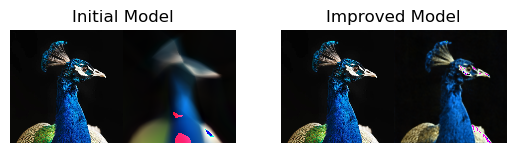

<Figure size 2000x2000 with 0 Axes>

PSNR value for improved model:  29.2
PSNR value for initialmodel 27.74


In [ ]:
#BONUS
#EValuation
dataset = SingleImageDataset('/home/mayank/828i/HW2/mypeacock.jpg')
dataloader = DataLoader(dataset, batch_size=4096,shuffle=False)
ground_truth_image1 = torch.zeros((dataset.h,dataset.w,3),dtype=torch.uint8)
predicted_image1 = torch.zeros_like(ground_truth_image1)
new_network.eval()
for batch in dataloader:
    position_x, positiony, intensity = batch["x"], batch["y"], batch["intensity"]
    x = position_x.to(device)
    y = positiony.to(device)
    #normalize 0 to 1
    x = x / dataset.w
    y = y / dataset.h
    coord = torch.vstack([x,y]).T
    positional_coord=pose_encod(B,coord)
    pred = new_network(positional_coord)
    #detach torch to numpy
    x = position_x.detach().numpy()
    y = positiony.detach().numpy()
    intensity = intensity.detach()
    pred_intensity = pred.type(torch.uint8).cpu().detach()
    #assign intensity to x,y positionsi., x,y to rgb
    for idx, (y1, x1) in enumerate(zip(y,x)):
        ground_truth_image1[y1,x1,:] = intensity[idx]
        predicted_image1[y1,x1,:] = pred_intensity[idx]

concat_image1 = torch.cat([ground_truth_image1, predicted_image1], dim=1)
fig, (ax1, ax2)=plt.subplots(nrows=1, ncols=2)
plt.figure(figsize=(20,20))
ax1.set_title('Initial Model')
ax1.imshow(concat_image)
ax1.axis('off')

ax2.imshow(concat_image1)
ax2.set_title('Improved Model')
ax2.axis('off')
plt.show()
ground_truth1 = ground_truth_image1.numpy()
predict1 = predicted_image1.numpy()
psnr_value1 = round(psnr(ground_truth1, predict1),2)
psnr_value=round(psnr(ground_truth, predict),2)
print("PSNR value for improved model: ", psnr_value1)
print("PSNR value for initialmodel",psnr_value)
